# Загрузить файл hr.csv

In [79]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter 

In [80]:
df = pd.read_csv("HR.csv")

In [81]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [82]:
stat = df.describe()

In [83]:
stat.loc["moda"] = df[df.columns[:-2]].apply(lambda x: Counter(x).most_common(1)[0][0])

In [84]:
#мода
#df[df.columns[:-2]].apply(lambda x: Counter(x).most_common(1)[0][0])

# Рассчитать и визуализировать корреляционную матрицу для переменных

In [85]:
import seaborn as sns

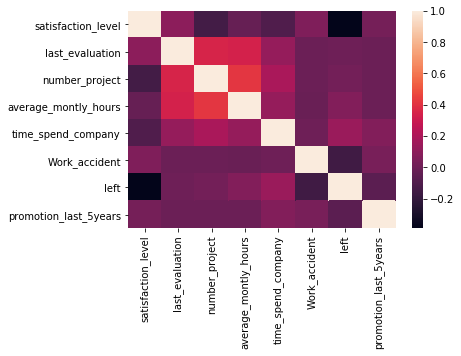

In [86]:
sns.heatmap(df.corr());

# Визуализировать несколько взаимосвязей между переменными

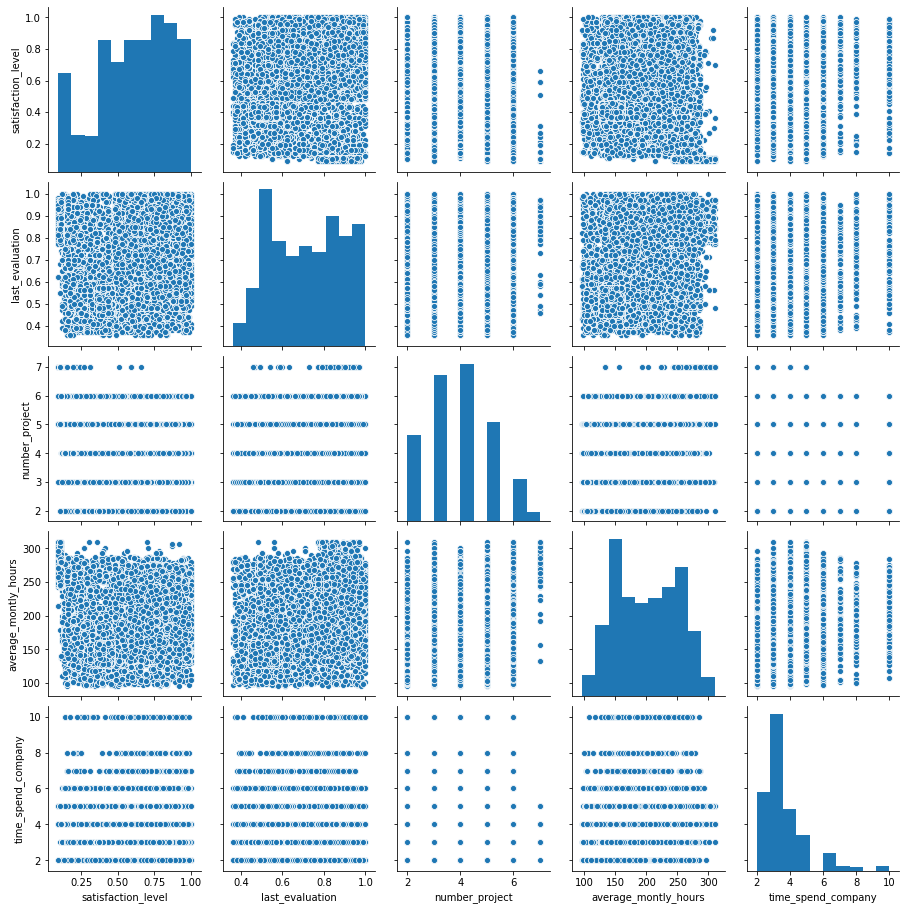

In [87]:
sns.pairplot(df[df.columns[:-5]]);

# T-TEST

Влияние уровня удовлетворенности на решение покинуть компанию.

In [88]:
tut = df[df["left"] == 0]["satisfaction_level"]

In [89]:
ushli = df[df["left"] == 1]["satisfaction_level"]

In [92]:
stats.ttest_ind(tut,ushli, equal_var = False)

Ttest_indResult(statistic=46.63641435277572, pvalue=0.0)

In [34]:
#Высокий показатель statistic value и низкий показатель pvalue говорят о том, что группа статистически значима.

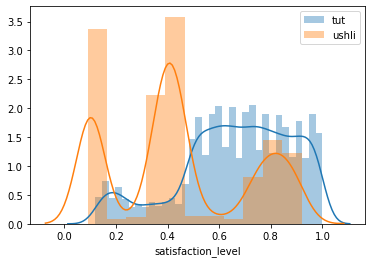

In [93]:
sns.distplot(tut)
sns.distplot(ushli)
plt.legend(["tut", "ushli"]);

In [94]:
kolvo_tut = df[df["left"] == 0]["number_project"]

In [95]:
kolvo_ushli = df[df["left"] == 1]["number_project"]

In [96]:
stats.ttest_ind(kolvo_tut,kolvo_ushli)

Ttest_indResult(statistic=-2.9138564358459607, pvalue=0.0035752138709418788)

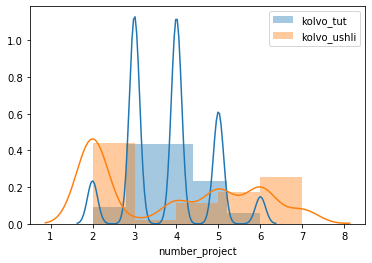

In [97]:
sns.distplot(kolvo_tut, bins = 5)
sns.distplot(kolvo_ushli, bins = 5)
plt.legend(["kolvo_tut", "kolvo_ushli"]);

Группы статистически различны. 

На уход из компании в меньшей степени влияет удовлетворенность. 

Однако сильно на принятие решения влияет количество проектов,
которые ведет сотрудник. 

Т.е. если сотрудник не получает достаточного количества работы, он принимает решение покинуть компанию. 

В случае "перегрузки" сотрудника работой, он тоже уйдет.

Вывод: 

**"Тот, кто золотой середине верен,
Мудро избежит и убогой кровли,
И того, что питает в других зависть, —
Дивных чертогов."**

# Рассчитать сколько работников работает в каждом департаменте

In [99]:
df.groupby("sales")["salary"].count().reset_index().rename(columns = {"salary" : "count"}).sort_values("count", ascending = False)

,sales,count
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


# Показать распределение сотрудников по зарплатам

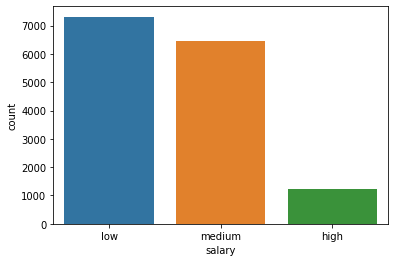

In [100]:
sns.countplot(df["salary"]);

# Показать распределение сотрудников по зарплатам совместно с департаментами

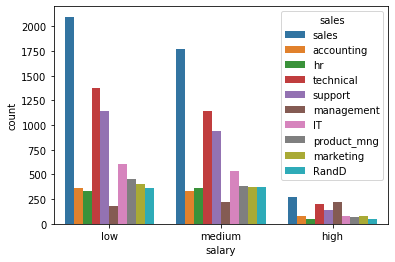

In [101]:
sns.countplot(data = df, x = "salary", hue = "sales");

# Сколько сотрудников покинули компанию

In [102]:
len(df[df["left"] == 1]["left"])

3571

# Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию

Гипотеза: "Ушедшие сотрудники работали в среднем больше, нежели те, кто остался в компании."

In [103]:
df.groupby("left")["average_montly_hours"].mean()

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

Вывод: Разница в 8 часов в месяц в сравнении с коллегами может повлиять на решение об уходе.
    
    Я бы точно ушел, зная, что кто-то халявит, а я пашу.
    
    Да и вы бы ушли, правда? Обидно ведь.

Гипотеза: "Сотрудники, которые покинули компанию, в среднем работали меньшее количество лет, чем те, что остались"

In [104]:
df.groupby("left")["time_spend_company"].mean()

left
0    3.380032
1    3.876505
Name: time_spend_company, dtype: float64

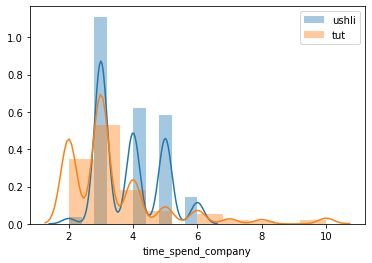

In [105]:
sns.distplot(df[df["left"] ==1]["time_spend_company"], bins = 10)
sns.distplot(df[df["left"] ==0]["time_spend_company"], bins = 10);
plt.legend(["ushli", "tut"]);

Вывод:
    Компанию покидают менее преданные люди. Особенно опасным периодом для работодателя становится стаж сотрудника, 
    равный 3 годам.